📂 Imágenes disponibles en la carpeta:
1. Captura.PNG
2. Captura1.PNG
3. captura10.PNG
4. captura11.PNG
5. captura12.PNG
6. captura13.PNG
7. captura14.PNG
8. captura2.PNG
9. Captura3.PNG
10. captura4.PNG
11. captura5.PNG
12. captura6.PNG
13. Captura7.PNG
14. captura8.PNG
15. captura9.PNG
16. processed_clothing_only.png
17. processed_face_image.png
18. processed_image.png
19. processed_no_bg.png
20. test_image.PNG
✅ Imagen seleccionada: captura11.PNG


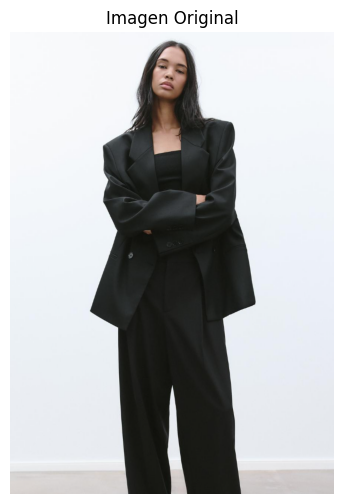

👕 Eliminando fondo y detectando rostros en la imagen...
✅ Imagen procesada guardada en: processed_face_image.png


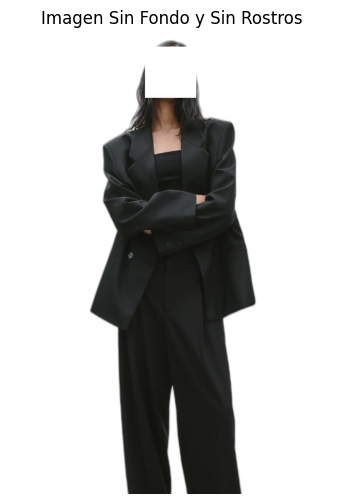

In [10]:
import cv2
import numpy as np
import os
from PIL import Image
from rembg import remove
import matplotlib.pyplot as plt

def select_image():
    """
    Lista los archivos en la carpeta del notebook y permite seleccionar una imagen.
    """
    files = [f for f in os.listdir() if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not files:
        print("⚠️ No se encontraron imágenes en la carpeta del notebook.")
        return None
    
    print("📂 Imágenes disponibles en la carpeta:")
    for i, file in enumerate(files):
        print(f"{i + 1}. {file}")
    
    choice = int(input("🔹 Ingresa el número de la imagen que quieres procesar: ")) - 1
    
    if 0 <= choice < len(files):
        print(f"✅ Imagen seleccionada: {files[choice]}")
        return files[choice]
    else:
        print("❌ Selección inválida.")
        return None

def remove_background_and_faces(image_path):
    """
    - Elimina el fondo de la imagen con `rembg`.
    - Detecta y elimina los rostros (los hace transparentes en PNG o negros en JPG).
    
    Retorna:
    - processed_face_path (str): Ruta de la imagen final procesada.
    """
    print("👕 Eliminando fondo y detectando rostros en la imagen...")

    # **PASO 1: Eliminar fondo con rembg**
    image = Image.open(image_path).convert("RGBA")  # Convertir a RGBA para manejar transparencia
    output = remove(image)
    processed_image_path = "processed_no_bg.png"
    output.save(processed_image_path)

    # **PASO 2: Cargar la imagen sin fondo en OpenCV**
    image_cv = cv2.imread(processed_image_path, cv2.IMREAD_UNCHANGED)

    # Si la imagen no tiene canal alfa (JPG), agregar transparencia
    if image_cv.shape[2] == 3:  # Si solo tiene BGR, agregar canal alfa
        b, g, r = cv2.split(image_cv)
        alpha = np.ones(b.shape, dtype=b.dtype) * 255  # Canal alfa lleno (sin transparencia)
        image_cv = cv2.merge((b, g, r, alpha))

    # Convertir a escala de grises para detección de rostros
    gray = cv2.cvtColor(image_cv[:, :, :3], cv2.COLOR_BGR2GRAY)

    # **PASO 3: Detectar rostros**
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # **PASO 4: Eliminar los rostros**
    for (x, y, w, h) in faces:
        # Hacer la zona del rostro transparente (RGBA)
        image_cv[y:y+h, x:x+w, 3] = 0  # Canal alfa a 0 (transparente)

    # **PASO 5: Guardar la imagen final**
    processed_face_path = "processed_face_image.png"
    cv2.imwrite(processed_face_path, image_cv)

    print(f"✅ Imagen procesada guardada en: {processed_face_path}")
    return processed_face_path

def show_image(image_path, title="Imagen"):
    """
    Muestra una imagen en Jupyter Notebook.
    """
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Si la imagen tiene transparencia (canal alfa), usar PIL para mostrarla bien
    if image.shape[2] == 4:
        image = Image.open(image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(title)
        plt.show()
    else:
        # Si la imagen es JPG (sin transparencia), mostrar con OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(title)
        plt.show()

# 🚀 PROBAR EL CÓDIGO
image_path = select_image()  # Seleccionar imagen desde la carpeta
if image_path:
    show_image(image_path, "Imagen Original")  # Mostrar imagen original
    processed_image = remove_background_and_faces(image_path)  # Procesar imagen
    show_image(processed_image, "Imagen Sin Fondo y Sin Rostros")  # Mostrar imagen procesada



🔹 Procesando: Captura.PNG


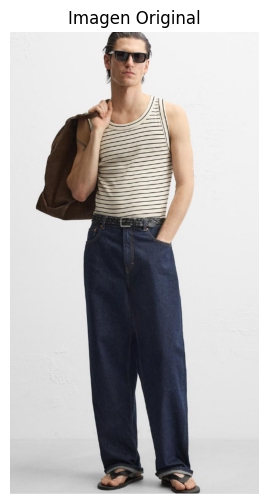

👕 Procesando imagen: Captura.PNG
✅ Imagen procesada guardada en: processed_images\Captura_no_faces.png


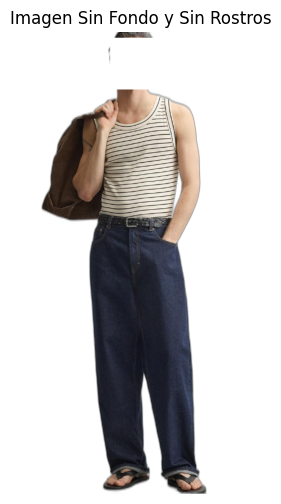


🔹 Procesando: Captura1.PNG


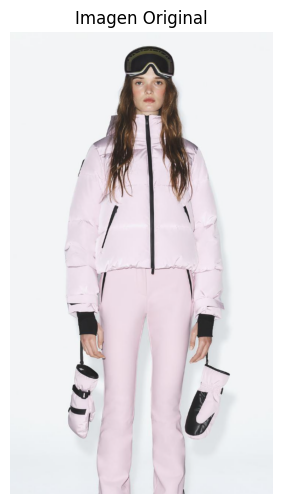

👕 Procesando imagen: Captura1.PNG
✅ Imagen procesada guardada en: processed_images\Captura1_no_faces.png


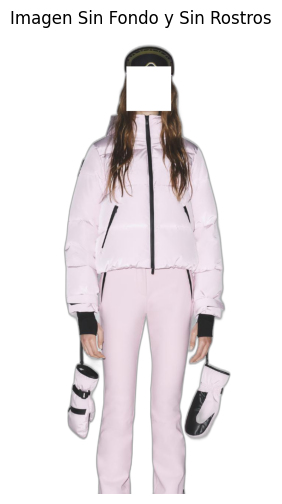


🔹 Procesando: captura10.PNG


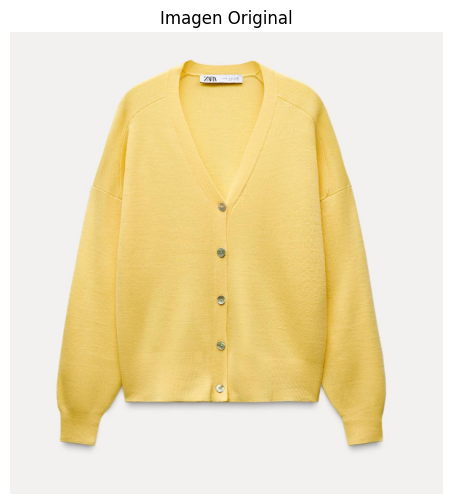

👕 Procesando imagen: captura10.PNG
✅ Imagen procesada guardada en: processed_images\captura10_no_faces.png


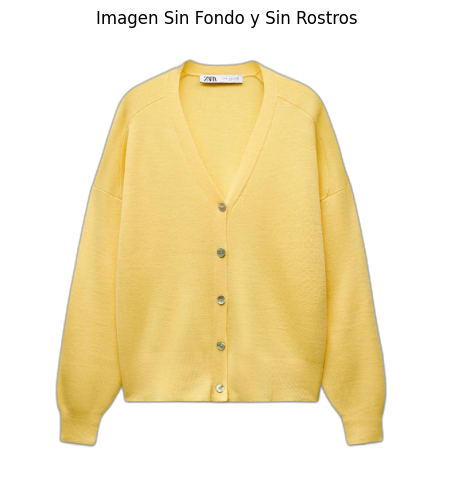


🔹 Procesando: captura11.PNG


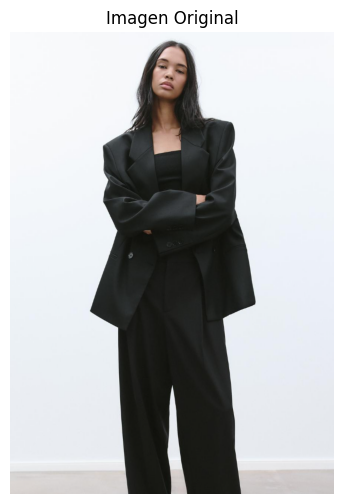

👕 Procesando imagen: captura11.PNG
✅ Imagen procesada guardada en: processed_images\captura11_no_faces.png


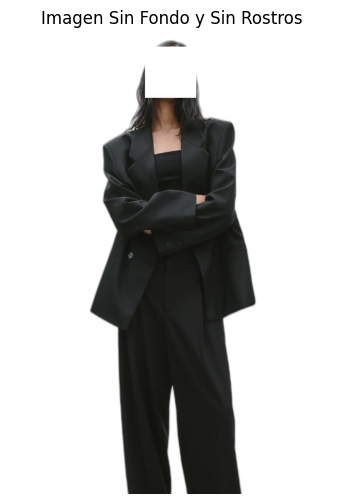


🔹 Procesando: captura12.PNG


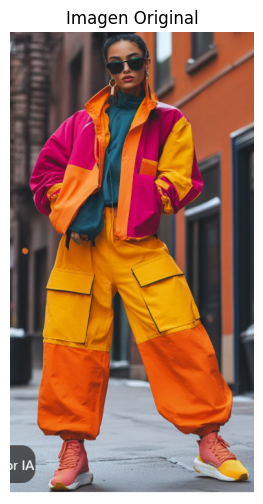

👕 Procesando imagen: captura12.PNG
✅ Imagen procesada guardada en: processed_images\captura12_no_faces.png


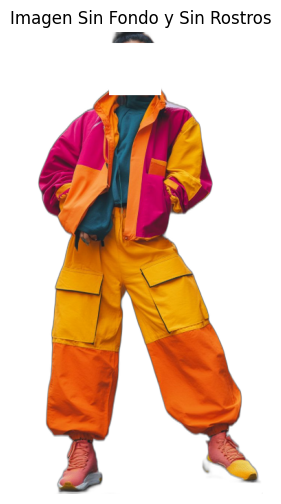


🔹 Procesando: captura13.PNG


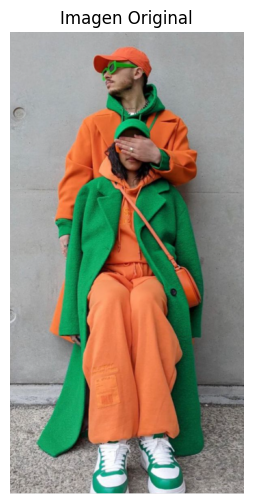

👕 Procesando imagen: captura13.PNG
✅ Imagen procesada guardada en: processed_images\captura13_no_faces.png


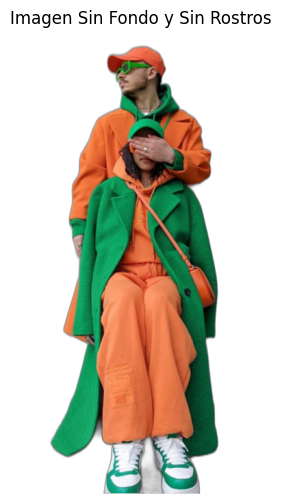


🔹 Procesando: captura14.PNG


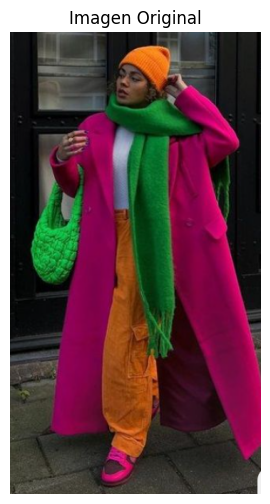

👕 Procesando imagen: captura14.PNG
✅ Imagen procesada guardada en: processed_images\captura14_no_faces.png


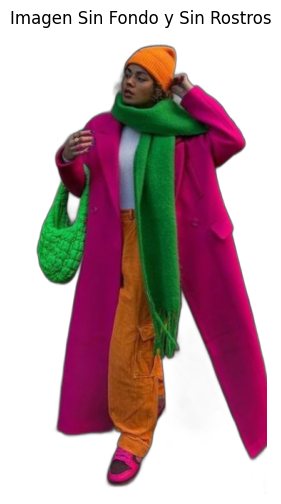


🔹 Procesando: captura2.PNG


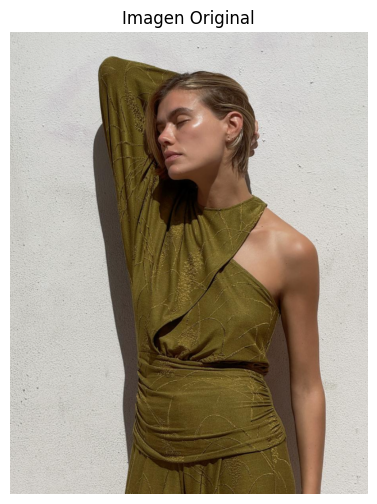

👕 Procesando imagen: captura2.PNG
✅ Imagen procesada guardada en: processed_images\captura2_no_faces.png


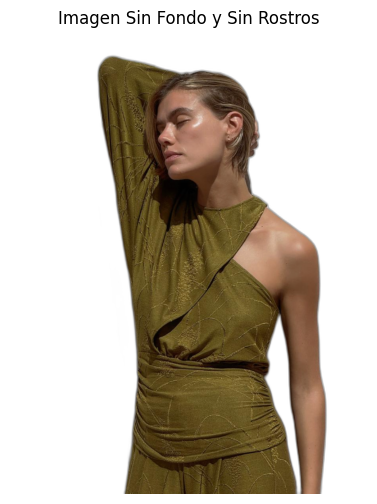


🔹 Procesando: Captura3.PNG


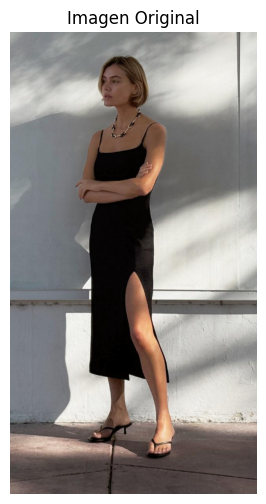

👕 Procesando imagen: Captura3.PNG
✅ Imagen procesada guardada en: processed_images\Captura3_no_faces.png


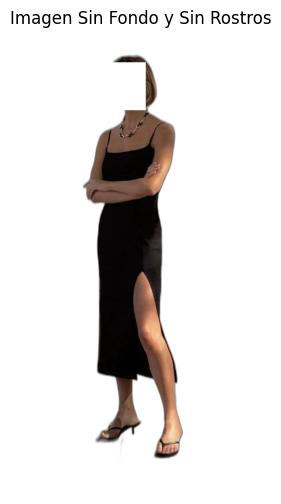


🔹 Procesando: captura4.PNG


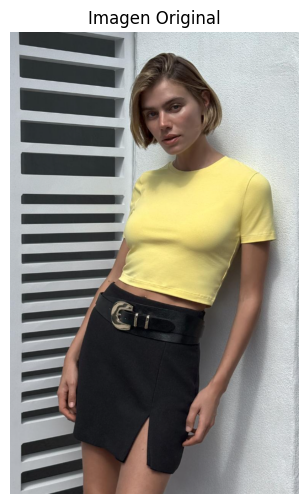

👕 Procesando imagen: captura4.PNG
✅ Imagen procesada guardada en: processed_images\captura4_no_faces.png


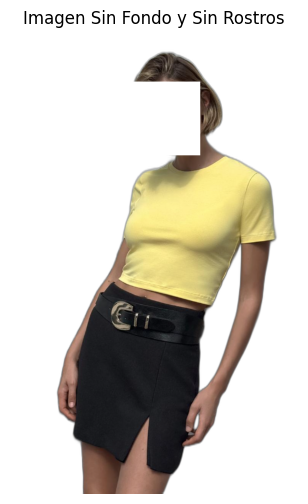


🔹 Procesando: captura5.PNG


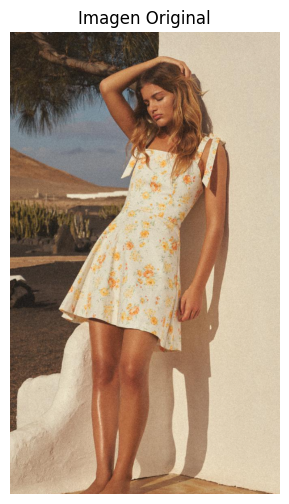

👕 Procesando imagen: captura5.PNG
✅ Imagen procesada guardada en: processed_images\captura5_no_faces.png


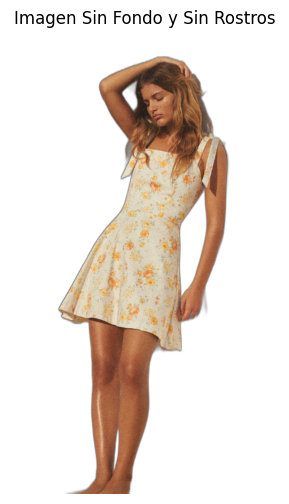


🔹 Procesando: captura6.PNG


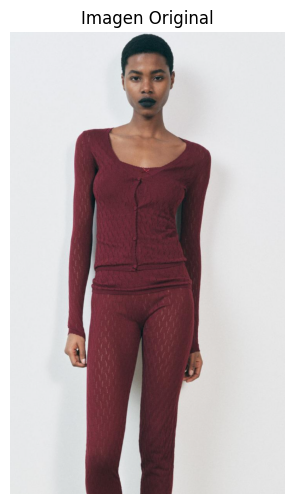

👕 Procesando imagen: captura6.PNG
✅ Imagen procesada guardada en: processed_images\captura6_no_faces.png


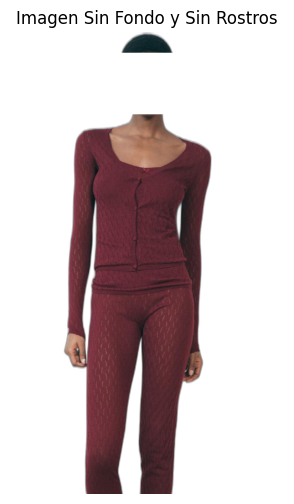


🔹 Procesando: Captura7.PNG


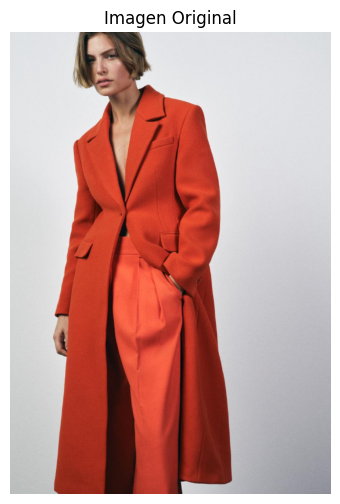

👕 Procesando imagen: Captura7.PNG
✅ Imagen procesada guardada en: processed_images\Captura7_no_faces.png


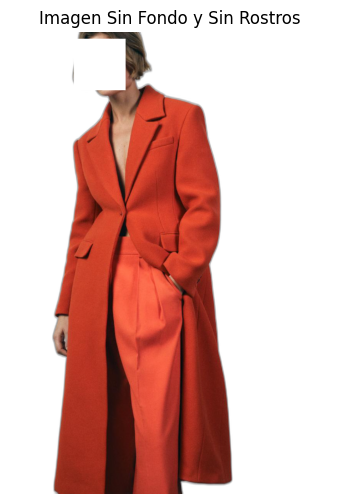


🔹 Procesando: captura8.PNG


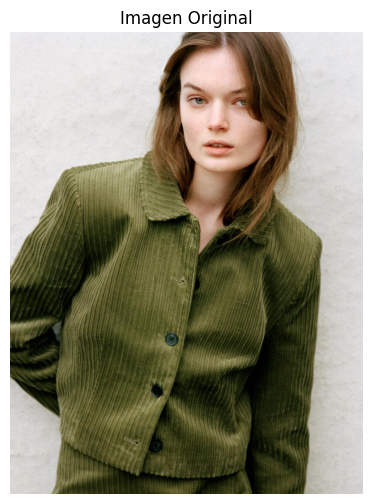

👕 Procesando imagen: captura8.PNG
✅ Imagen procesada guardada en: processed_images\captura8_no_faces.png


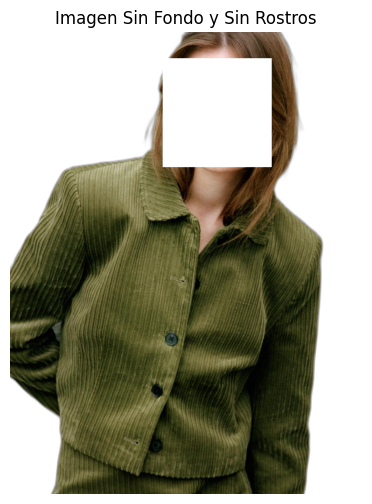


🔹 Procesando: captura9.PNG


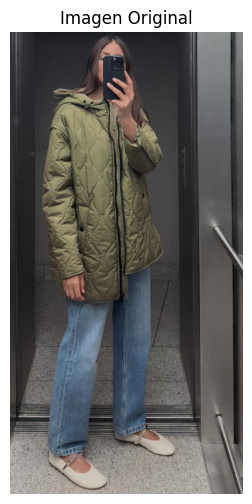

👕 Procesando imagen: captura9.PNG
✅ Imagen procesada guardada en: processed_images\captura9_no_faces.png


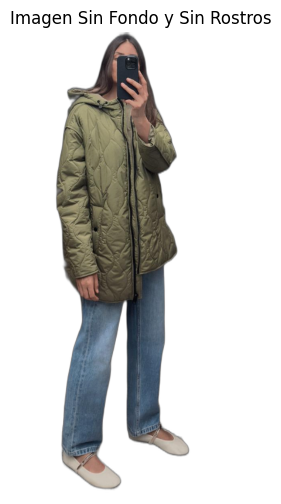


🔹 Procesando: processed_clothing_only.png


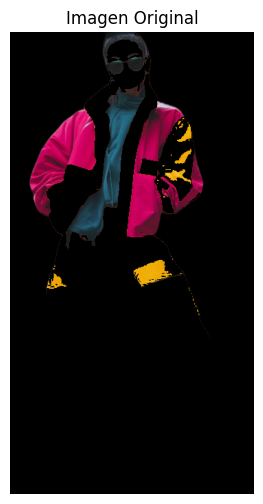

👕 Procesando imagen: processed_clothing_only.png
✅ Imagen procesada guardada en: processed_images\processed_clothing_only_no_faces.png


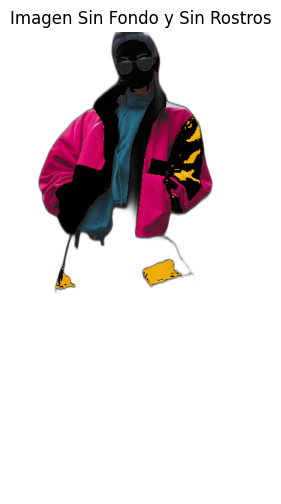


🔹 Procesando: processed_face_image.png


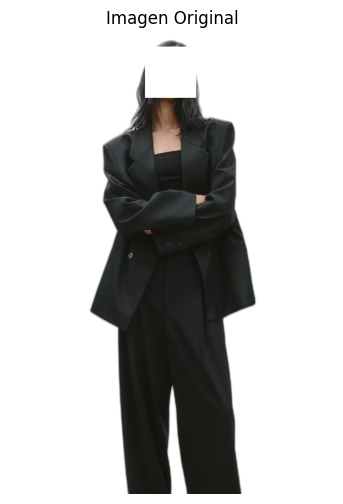

👕 Procesando imagen: processed_face_image.png
✅ Imagen procesada guardada en: processed_images\processed_face_image_no_faces.png


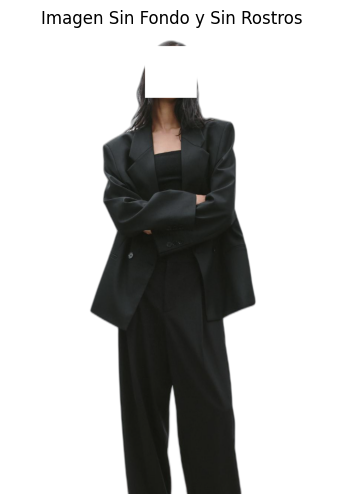


🔹 Procesando: processed_image.png


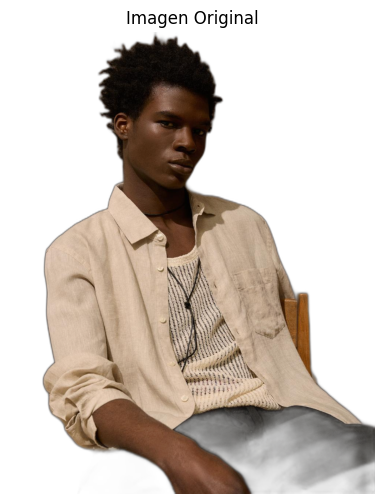

👕 Procesando imagen: processed_image.png
✅ Imagen procesada guardada en: processed_images\processed_image_no_faces.png


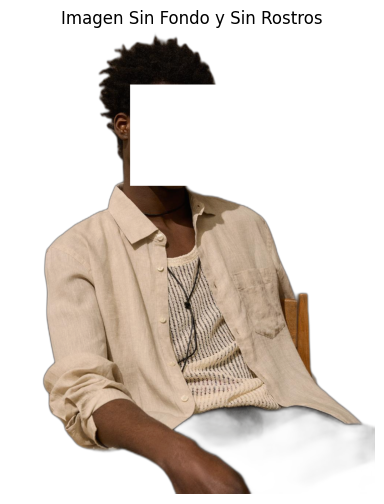


🔹 Procesando: processed_no_bg.png


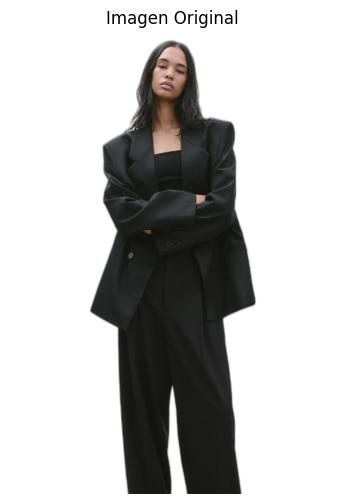

👕 Procesando imagen: processed_no_bg.png
✅ Imagen procesada guardada en: processed_images\processed_no_bg_no_faces.png


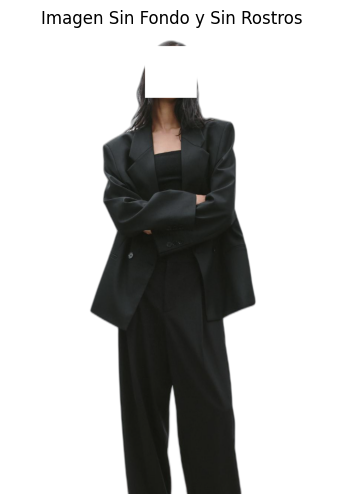


🔹 Procesando: test_image.PNG


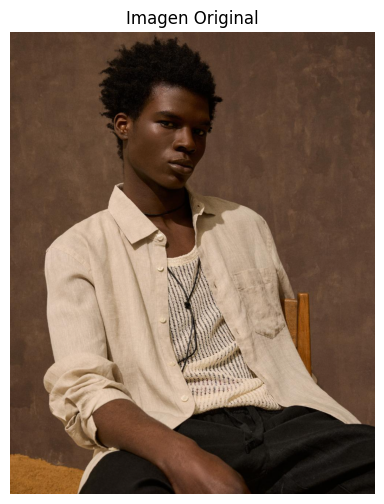

👕 Procesando imagen: test_image.PNG
✅ Imagen procesada guardada en: processed_images\test_image_no_faces.png


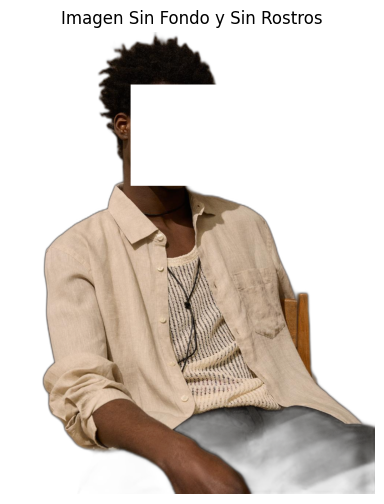

In [11]:
import cv2
import numpy as np
import os
from PIL import Image
from rembg import remove
import matplotlib.pyplot as plt

def list_images():
    """
    Lista todas las imágenes en la carpeta del notebook.
    """
    return [f for f in os.listdir() if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

def remove_background_and_faces(image_path, output_folder="processed_images"):
    """
    - Elimina el fondo de la imagen con `rembg`.
    - Detecta y elimina los rostros (los hace transparentes en PNG o negros en JPG).
    
    Retorna:
    - processed_face_path (str): Ruta de la imagen final procesada.
    """
    print(f"👕 Procesando imagen: {image_path}")

    # **PASO 1: Crear carpeta de salida si no existe**
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # **PASO 2: Eliminar fondo con rembg**
    image = Image.open(image_path).convert("RGBA")  # Convertir a RGBA para manejar transparencia
    output = remove(image)

    # **PASO 3: Guardar la imagen sin fondo**
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    processed_image_path = os.path.join(output_folder, f"{image_name}_no_bg.png")
    output.save(processed_image_path)

    # **PASO 4: Cargar la imagen sin fondo en OpenCV**
    image_cv = cv2.imread(processed_image_path, cv2.IMREAD_UNCHANGED)

    # Si la imagen no tiene canal alfa (JPG), agregar transparencia
    if image_cv.shape[2] == 3:  # Si solo tiene BGR, agregar canal alfa
        b, g, r = cv2.split(image_cv)
        alpha = np.ones(b.shape, dtype=b.dtype) * 255  # Canal alfa lleno (sin transparencia)
        image_cv = cv2.merge((b, g, r, alpha))

    # Convertir a escala de grises para detección de rostros
    gray = cv2.cvtColor(image_cv[:, :, :3], cv2.COLOR_BGR2GRAY)

    # **PASO 5: Detectar rostros**
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # **PASO 6: Eliminar los rostros**
    for (x, y, w, h) in faces:
        # Hacer la zona del rostro transparente (RGBA)
        image_cv[y:y+h, x:x+w, 3] = 0  # Canal alfa a 0 (transparente)

    # **PASO 7: Guardar la imagen final**
    processed_face_path = os.path.join(output_folder, f"{image_name}_no_faces.png")
    cv2.imwrite(processed_face_path, image_cv)

    print(f"✅ Imagen procesada guardada en: {processed_face_path}")
    return processed_face_path

def show_image(image_path, title="Imagen"):
    """
    Muestra una imagen en Jupyter Notebook.
    """
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Si la imagen tiene transparencia (canal alfa), usar PIL para mostrarla bien
    if image.shape[2] == 4:
        image = Image.open(image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(title)
        plt.show()
    else:
        # Si la imagen es JPG (sin transparencia), mostrar con OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(title)
        plt.show()

# 🚀 PROBAR EL CÓDIGO CON TODAS LAS IMÁGENES
image_files = list_images()  # Obtener lista de imágenes

if not image_files:
    print("⚠️ No se encontraron imágenes en la carpeta del notebook.")
else:
    for image_file in image_files:
        print(f"\n🔹 Procesando: {image_file}")
        show_image(image_file, "Imagen Original")  # Mostrar imagen original
        processed_image = remove_background_and_faces(image_file)  # Procesar imagen
        show_image(processed_image, "Imagen Sin Fondo y Sin Rostros")  # Mostrar imagen procesada
